Project Description: You are hired as data scientists by Mashable, an online news platform that generates buzz through shares of its posts. Your task is to build a model to predict the number of shares a news article will receive based on its characteristics.\
Data: The data comes from Mashable.com, hosted on the UC Irvine Machine Learning
repository: https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity.
You can download the dataset from there or at https://richardson.byu.edu/220/
OnlineNewsPopularity.csv. There are 61 variables in total. A description of the
variables is available at https://richardson.byu.edu/220/ONPvariables.txt. The
target variable is the number of shares a news article receives, located as the last variable in the dataset.

# Exploratory Data Analysis (EDA)

## Imports and Data Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
import seaborn as sns
from scipy.io import arff
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
news = fetch_ucirepo(id=332)

In [3]:
# data (as pandas dataframes)
news_predictors_retrieved = news.data.features
news_target = news.data.targets   # (shares)

# This is necessary because for some reason all of the variables had A SINGLE SPACE IN FRONT OF THEM AND IT TOOK ME LIKE A HALF HOUR TO FIGURE THAT OUT
news_predictors = pd.DataFrame()
for predictor in news_predictors_retrieved:
  key = predictor.strip()
  news_predictors[key] = news_predictors_retrieved[predictor]

# # variable information
# print(news.variables)

## Plotting the Target Variable

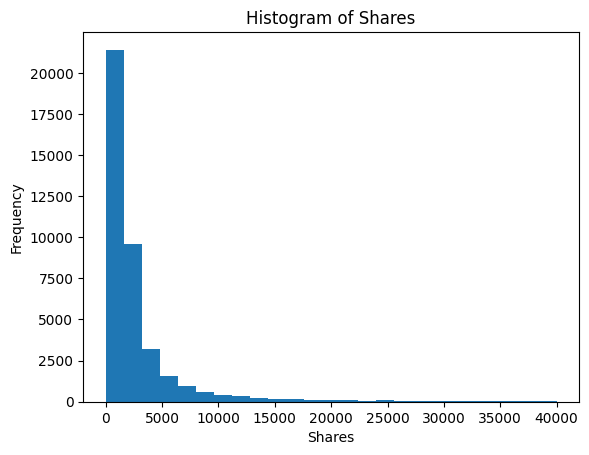

In [4]:
# Plot target variable
plt.hist(news_target, range=[0, 40000], bins=25)
plt.title('Histogram of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

# sns.kdeplot(news_target)

The reader should note that the view of the data in this histogram does not contain all outliers; a smaller range has been chosen to allow for a better look at the data. The largest outlier is around 800,000, and retaining a range with that outlier prevented the data from being read well.


By observing the histogram, which has a long right tail, it can be determined that the data of the target variable would benefit from a logarithmic transformation. This transformation will be applied and used throughout the rest of the EDA.

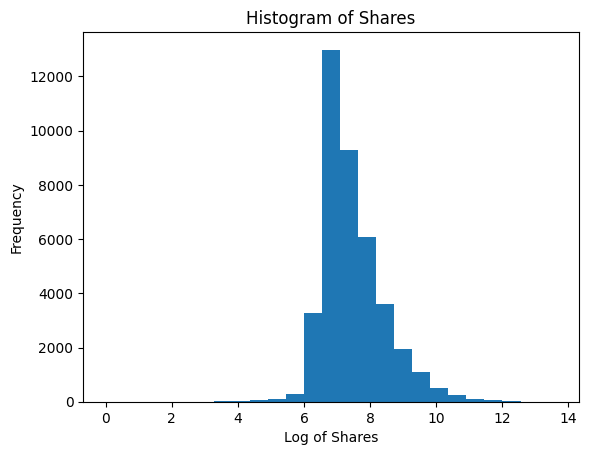

In [5]:
log_news_target = np.log(news_target)

# Plot log of target variable
plt.hist(log_news_target, bins=25)
plt.title('Histogram of Shares')
plt.xlabel('Log of Shares')
plt.ylabel('Frequency')
plt.show()

After the logarithmic transformation, the data has a much more normal shape, and no longer deals with such egregious outliers (the range for this plot has not been altered at all); it is clear that this transformation was appropriate.

## Fitting a Linear Regression Model

In [6]:
# fit a linear regression model and determine the most significant predictors
news_predictors_fitted = news_predictors.copy()
# drop insignificant predictors
predictors_to_drop = ["self_reference_max_shares", "avg_positive_polarity", "weekday_is_saturday", "is_weekend", "LDA_01", "weekday_is_sunday", "min_negative_polarity", "global_rate_negative_words", "n_non_stop_words", "max_positive_polarity", "kw_max_max", "LDA_03", "abs_title_sentiment_polarity", "max_negative_polarity", "data_channel_is_world", "global_sentiment_polarity", "num_videos", "self_reference_min_shares"]
news_predictors_fitted = news_predictors_fitted.drop(predictors_to_drop, axis='columns')

news_predictors_fitted = sm.add_constant(news_predictors_fitted)
lin_reg = sm.OLS(log_news_target, news_predictors_fitted).fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     143.4
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        05:51:31   Log-Likelihood:                -50715.
No. Observations:               39644   AIC:                         1.015e+05
Df Residuals:                   39603   BIC:                         1.019e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             6.7509      0.056    120.822      0.000       6.641       6.860
n_tokens_title                    0.0073      0.002      3.355      0.001       0.003       0.012
n_tokens_content               4.976e-05   1.25e-05      3.970      0.000    2.52e-05    7.43e-05
n_unique_tokens                   0.2800      0.109      2.568      0.010       0.066       0.494
n_non_stop_unique_tokens         -0.2990      0.118     -2.544      0.011      -0.529      -0.069
num_hrefs                         0.0043      0.000      8.553      0.000       0.003       0.005
num_self_hrefs                   -0.0079      0.001     -5.998      0.000      -0.010      -0.005
num_imgs                          0.0023      0.001      3.483      0.000       0.001       0.004
average_token_length             -0.0974      0.018     -5.458      0.000      -0.132      -0.062
num_keywords                      0.0123      0.003      4.425      0.000       0.007       0.018
data_channel_is_lifestyle        -0.0839      0.025     -3.309      0.001      -0.134      -0.034
data_channel_is_entertainment    -0.1727      0.016    -10.671      0.000      -0.204      -0.141
data_channel_is_bus              -0.1458      0.024     -6.090      0.000      -0.193      -0.099
data_channel_is_socmed            0.1824      0.023      7.870      0.000       0.137       0.228
data_channel_is_tech              0.1261      0.021      5.868      0.000       0.084       0.168
kw_min_min                        0.0009   8.05e-05     10.894      0.000       0.001       0.001
kw_max_min                      1.67e-05   3.79e-06      4.408      0.000    9.27e-06    2.41e-05
kw_avg_min                       -0.0001   2.33e-05     -5.317      0.000      -0.000   -7.81e-05
kw_min_max                    -3.567e-07   8.78e-08     -4.064      0.000   -5.29e-07   -1.85e-07
kw_avg_max                    -2.766e-07   5.78e-08     -4.787      0.000    -3.9e-07   -1.63e-07
kw_min_avg                    -5.166e-05   5.69e-06     -9.073      0.000   -6.28e-05   -4.05e-05
kw_max_avg                    -4.254e-05   1.89e-06    -22.557      0.000   -4.62e-05   -3.88e-05
kw_avg_avg                        0.0003   1.07e-05     31.747      0.000       0.000       0.000
self_reference_avg_sharess     1.952e-06   1.85e-07     10.561      0.000    1.59e-06    2.31e-06
weekday_is_monday                -0.2204      0.016    -13.568      0.000      -0.252      -0.189
weekday_is_tuesday               -0.2871      0.016    -18.083      0.000      -0.318      -0.256
weekday_is_wednesday             -0.2836      0.016    -17.864      0.000      -0.315      -0.253
weekday_is_thursday              -0.2785      0.016    -17.481      0.000      -0.310      -0.247
weekday_is_friday                -0.2149     

In [7]:
print("The predictors which were determined to be the most significant are as follows:")
i = 1
for predictor in news_predictors_fitted:
  # const is the intercept here I'm pretty sure
  if predictor == "const":
    continue
  print(f"{i}:\t{predictor}")
  i += 1

The predictors which were determined to be the most significant are as follows:
1:	n_tokens_title
2:	n_tokens_content
3:	n_unique_tokens
4:	n_non_stop_unique_tokens
5:	num_hrefs
6:	num_self_hrefs
7:	num_imgs
8:	average_token_length
9:	num_keywords
10:	data_channel_is_lifestyle
11:	data_channel_is_entertainment
12:	data_channel_is_bus
13:	data_channel_is_socmed
14:	data_channel_is_tech
15:	kw_min_min
16:	kw_max_min
17:	kw_avg_min
18:	kw_min_max
19:	kw_avg_max
20:	kw_min_avg
21:	kw_max_avg
22:	kw_avg_avg
23:	self_reference_avg_sharess
24:	weekday_is_monday
25:	weekday_is_tuesday
26:	weekday_is_wednesday
27:	weekday_is_thursday
28:	weekday_is_friday
29:	LDA_00
30:	LDA_02
31:	LDA_04
32:	global_subjectivity
33:	global_rate_positive_words
34:	rate_positive_words
35:	rate_negative_words
36:	min_positive_polarity
37:	avg_negative_polarity
38:	title_subjectivity
39:	title_sentiment_polarity
40:	abs_title_subjectivity


## Fitting a Regression Tree

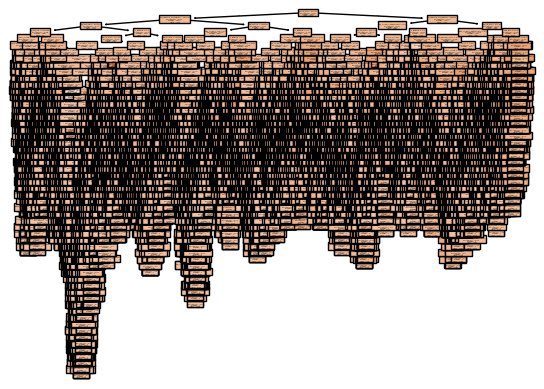

<Figure size 2000x1000 with 0 Axes>

In [8]:
# build initial tree
# this is an absolute BEAST to build. took at least 30 minutes for me every time, jsyk
init_reg_tree = DecisionTreeRegressor().fit(news_predictors, log_news_target)

plot_tree(init_reg_tree, feature_names=news_predictors.columns, filled=True)
plt.figure(figsize=(20, 10))
plt.tight_layout()
plt.show()

In [9]:
feature_importances = zip(news_predictors.columns, init_reg_tree.feature_importances_)
features = []
importances = []
print("Feature importances (greater than 0.01) are as follows:")
i = 1
for feature, importance in feature_importances:
  if feature == "const":
    continue
  if importance < 0.01:
    continue
  features.append(feature)
  importances.append(importance)
  print(f"{i}:\t{feature} : {round(importance, 4)}")
  i += 1

Feature importances (greater than 0.01) are as follows:
1:	n_tokens_title : 0.0177
2:	n_tokens_content : 0.0263
3:	n_unique_tokens : 0.0316
4:	n_non_stop_unique_tokens : 0.0277
5:	num_hrefs : 0.0262
6:	num_self_hrefs : 0.0103
7:	num_imgs : 0.0154
8:	average_token_length : 0.0328
9:	kw_max_min : 0.0254
10:	kw_avg_min : 0.0278
11:	kw_min_max : 0.0176
12:	kw_avg_max : 0.0325
13:	kw_min_avg : 0.0178
14:	kw_max_avg : 0.0363
15:	kw_avg_avg : 0.0992
16:	self_reference_min_shares : 0.023
17:	self_reference_max_shares : 0.017
18:	self_reference_avg_sharess : 0.0401
19:	is_weekend : 0.0104
20:	LDA_00 : 0.0255
21:	LDA_01 : 0.0298
22:	LDA_02 : 0.0297
23:	LDA_03 : 0.0297
24:	LDA_04 : 0.0263
25:	global_subjectivity : 0.0279
26:	global_sentiment_polarity : 0.026
27:	global_rate_positive_words : 0.0269
28:	global_rate_negative_words : 0.0215
29:	rate_positive_words : 0.0133
30:	avg_positive_polarity : 0.0284
31:	avg_negative_polarity : 0.023
32:	max_negative_polarity : 0.0133
33:	title_subjectivity : 

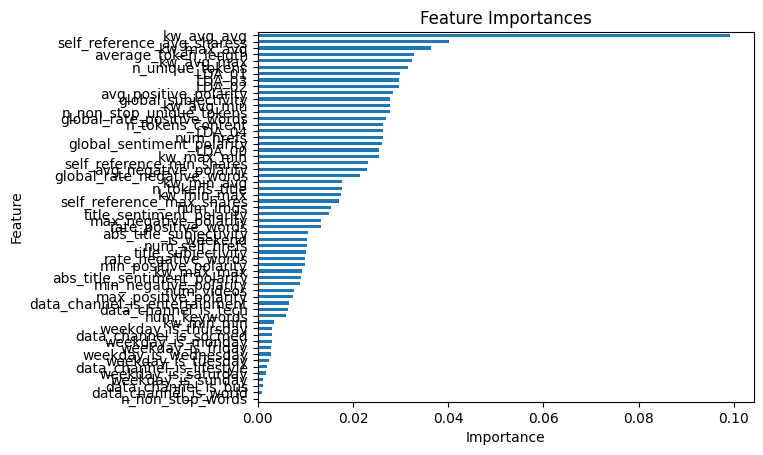

In [10]:
pd.Series(init_reg_tree.feature_importances_, index=news_predictors.columns).sort_values().plot(kind='barh', title='Feature Importances')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

The above graph shows *all* feature importances.

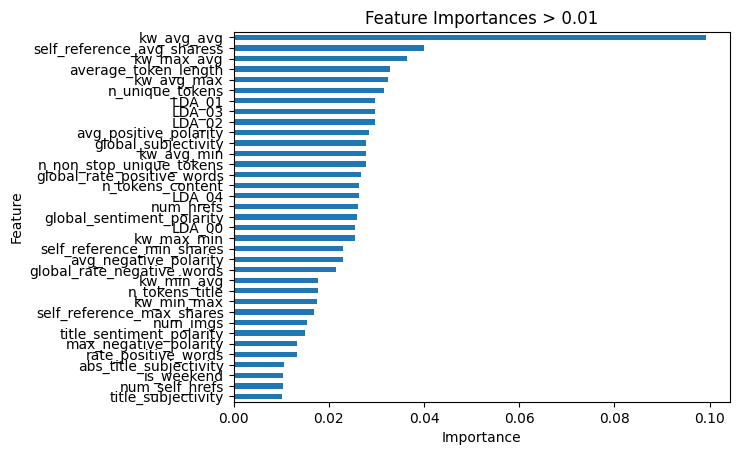

In [11]:
pd.Series(importances, index=features).sort_values().plot(kind='barh', title='Feature Importances > 0.01')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

The above graph indicates the importance of each feature whose feature importance is above 0.01; this threshold was chosen in an attempt to remove many unimportant features, while retaining a similar number of significant predictors to the linear regression tree for comparison.

## Exploration of Variable Relationships

In [12]:
# find the predictors which are the same for the linear regression model and the regression tree
same_predictors = []
for lin_predictor in news_predictors_fitted:
  for tree_predictor in features:
    if lin_predictor == tree_predictor:
      same_predictors.append(lin_predictor)

print("The important features found by both models are as follows: ")
i = 1
for predictor in same_predictors:
  print(f"{i}:\t{predictor}")
  i +=1

The important features found by both models are as follows: 
1:	n_tokens_title
2:	n_tokens_content
3:	n_unique_tokens
4:	n_non_stop_unique_tokens
5:	num_hrefs
6:	num_self_hrefs
7:	num_imgs
8:	average_token_length
9:	kw_max_min
10:	kw_avg_min
11:	kw_min_max
12:	kw_avg_max
13:	kw_min_avg
14:	kw_max_avg
15:	kw_avg_avg
16:	self_reference_avg_sharess
17:	LDA_00
18:	LDA_02
19:	LDA_04
20:	global_subjectivity
21:	global_rate_positive_words
22:	rate_positive_words
23:	avg_negative_polarity
24:	title_subjectivity
25:	title_sentiment_polarity
26:	abs_title_subjectivity


The results of the regression tree change slightly each time it loads; because of this, the results in the previous cell may not be the same each time it is loaded. The following predictors were chosen for examination based upon the significant features which were found in the linear regression, as well as the ones which the tree model dictated as most significant at the time of predictor visualization. Note that all of the predictors examined have been determined to be significant based upon the model evaluation.

The features which will be examined are as follows:

*   average_token_length (feature importance of 0.0312 and p-val of 0)
*   kw_avg_max (feature importance of 0.0302 and p-val of 0)
*   LDA_02 (feature importance of 0.0293 and p-value of 0)
*   kw_max_avg (feature importance of 0.0344 and p-value of 0)
*   kw_avg_avg (feature importance of 0.0976 and p-value of 0)
*   self_reference_avg_sharess (feature importance of 0.0401 and p-value of 0)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[]

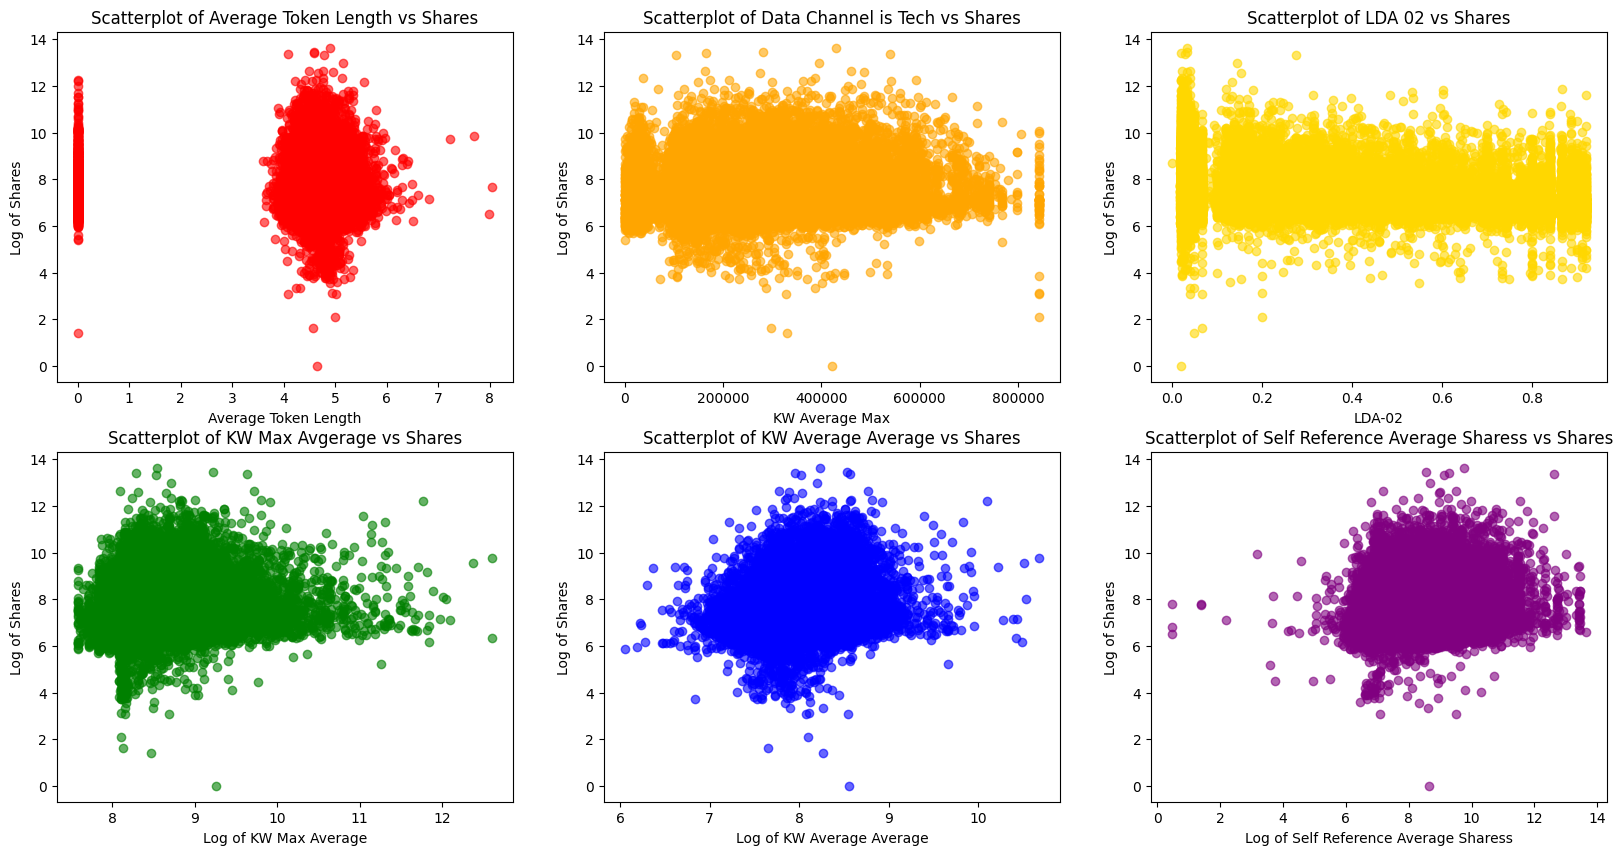

In [13]:
# Visualize Data Relationships
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20, 10)

axs[0,0].scatter(news_predictors['average_token_length'], log_news_target, alpha=0.6, color='r', edgecolor='r')
axs[0,0].set_xlabel("Average Token Length")
axs[0,0].set_ylabel("Log of Shares")
axs[0,0].set_title("Scatterplot of Average Token Length vs Shares")

axs[0,1].scatter(news_predictors['kw_avg_max'], log_news_target, alpha=0.6, color='orange', edgecolor='orange')
axs[0,1].set_xlabel("KW Average Max")
axs[0,1].set_ylabel("Log of Shares")
axs[0,1].set_title("Scatterplot of Data Channel is Tech vs Shares")

axs[0,2].scatter(news_predictors['LDA_02'], log_news_target, alpha=0.6, color='gold', edgecolor='gold')
axs[0,2].set_xlabel("LDA-02")
axs[0,2].set_ylabel("Log of Shares")
axs[0,2].set_title("Scatterplot of LDA 02 vs Shares")

axs[1,0].scatter(np.log(news_predictors['kw_max_avg']), log_news_target, alpha=0.6, color='green', edgecolor='green')
axs[1,0].set_xlabel("Log of KW Max Average")
axs[1,0].set_ylabel("Log of Shares")
axs[1,0].set_title("Scatterplot of KW Max Avgerage vs Shares")

axs[1,1].scatter(np.log(news_predictors['kw_avg_avg']), log_news_target, alpha=0.6, color='b', edgecolor='b')
axs[1,1].set_xlabel("Log of KW Average Average")
axs[1,1].set_ylabel("Log of Shares")
axs[1,1].set_title("Scatterplot of KW Average Average vs Shares")

axs[1,2].scatter(np.log(news_predictors['self_reference_avg_sharess']), log_news_target, alpha=0.6, color='purple', edgecolor='purple')
axs[1,2].set_xlabel("Log of Self Reference Average Sharess")
axs[1,2].set_ylabel("Log of Shares")
axs[1,2].set_title("Scatterplot of Self Reference Average Sharess vs Shares")

# Plot the data exploration
plt.plot()

The lower three plots have had a logarithmic transformation applied to their predictor data because, before the transformation was applied, their distributions were incredibly right skewed (all of the data was clumped mostly in the lower corners).

Each of the following statements are made based on the above graphs.

"average token length" appears to have a potential, very slightly positive relationship with the log of "shares".\
"kw average max" appears to have a very slightly positive relationship with the log of "shares".\
"LDA-02" appears to have a slightly negative relationship with the log of "shares".\
The log of "kw max average" appears to have a very slightly positive relationship with the log of "shares".\
The log of "kw average average" appears to have a slightly positive relationship with the log of "shares".\
The log of "self reference average sharess" appears to have a slightly positive relationships with the log of "shares".

None of these predictor variables appears to have an incredibly strong relationship with the target variable; however, they do still appear to have a relationship, as noted in the above statements.

## EDA Writeup

Please refer to the previous plots for figures of the relationship between the target variables and potentially significant predictors.

The initial exploration of the target variable, as seen in the histograms above, indicated that the data would benefit from a logarithmic transformation.

The initial linear regression model (which, it should be noted, does not use a train-test split) had an R^2 of 0.126 and retained 40 of the original 61 variables as significant after fitting using p-values (these may be noted in the summary provided above).

The initial regression tree model (which also does not use a train-test split and which was run with no restriction on node depth) indicated roughly 35 variables with a feature importance of greater than 0.01 (this number has fluctuated slightly each time the tree is run, as the resulting tree is slightly different on each run; the numbers used are from the last run performed for exploratory data analysis).

Between the two models, there were 26 predictor variables in common; of these, the 6 with the lowest R^2 and the highest feature importance were selected. Their relationships with the target variable were investigated via the scatterplots seen above; each of these variables do appear to have a relationship with the target variable, and ought to be considered in further development of the model.

# Linear Regression Modeling

Linear Regression Modeling: Build and tune a linear regression model with high
predictive power, explaining to Mashable which features most influence the number of shares.
1. Split the data into training and testing sets. Use the training set for model fitting and the testing set to check for overfitting and predictive performance.
2. Explore transformations of the target and other variables.
3. Explore higher-order terms.
4. Reduce the model using the following methods:\
• Stepwise model evaluation methods to remove insignificant variables.\
• LASSO regression to fit the full model and remove insignificant variables.
Tune the model to find the best α.
5. Write a section in your technical report that reports the out-of-sample performance of the models. Discuss the most significant predictors and evaluate the model's usefulness for predicting future shares.


In [14]:
X_train, X_test, y_train, y_test = train_test_split(news_predictors, news_target, test_size=0.2, random_state=0)

def custom_sqrt(x):
    return np.where(x < 0, -np.sqrt(np.abs(x)), np.sqrt(x))

# Transformations of targets
y_train_log = np.log(y_train + 2)
y_test_log = np.log(y_test + 2)

y_train_sqrt = custom_sqrt(y_train)
y_test_sqrt = custom_sqrt(y_test)

y_train_inv = 1 / (y_train + 1e-6)
y_test_inv = 1 / (y_test + 1e-6)

y_train_squared = y_train ** 2
y_test_squared = y_test ** 2

# Transformations of predictors
X_train_log = np.log(X_train + 2)
X_test_log = np.log(X_test + 2)

X_train_sqrt = X_train.apply(lambda x: custom_sqrt(x))
X_test_sqrt = X_test.apply(lambda x: custom_sqrt(x))

X_train_inv = 1 / (X_train + 1e-6)
X_test_inv = 1 / (X_test + 1e-6)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
fixed_point = False
best_X_train = X_train.copy()
best_X_test = X_test.copy()
best_y_train = y_train.copy()
best_y_test = y_test.copy()
num_iter = -1

initial_score = LinearRegression().fit(best_X_train, best_y_train).score(best_X_test, best_y_test)
print('Initial score: ' + str(initial_score))

while not fixed_point:
  num_iter += 1
  for predictor in news_predictors:
    # previous best
    best_score = LinearRegression().fit(best_X_train, best_y_train).score(best_X_test, best_y_test)
    prev_best_score = best_score

    # baseline
    baseline_X_train = best_X_train.copy()
    baseline_X_train[predictor] = X_train[predictor]
    baseline_X_test = best_X_test.copy()
    baseline_X_test[predictor] = X_test[predictor]

    baseline_score = LinearRegression().fit(baseline_X_train, best_y_train).score(baseline_X_test, best_y_test)
    if baseline_score > best_score:
      best_X_train = baseline_X_train.copy()
      best_X_test = baseline_X_test.copy()
      best_score = baseline_score

    # log
    log_X_train = best_X_train.copy()
    log_X_train[predictor] = X_train_log[predictor]
    log_X_train.rename(columns={predictor: predictor + '_log'}, inplace=True)
    log_X_test = best_X_test.copy()
    log_X_test[predictor] = X_test_log[predictor]
    log_X_test.rename(columns={predictor: predictor + '_log'}, inplace=True)

    log_score = LinearRegression().fit(log_X_train, best_y_train).score(log_X_test, best_y_test)
    if log_score > best_score:
      best_X_train = log_X_train.copy()
      best_X_test = log_X_test.copy()
      best_score = log_score

    # sqrt
    sqrt_X_train = best_X_train.copy()
    sqrt_X_train[predictor] = X_train_sqrt[predictor]
    sqrt_X_train.rename(columns={predictor: predictor + '_sqrt'}, inplace=True)
    sqrt_X_test = best_X_test.copy()
    sqrt_X_test[predictor] = X_test_sqrt[predictor]
    sqrt_X_test.rename(columns={predictor: predictor + '_sqrt'}, inplace=True)

    sqrt_score = LinearRegression().fit(sqrt_X_train, best_y_train).score(sqrt_X_test, best_y_test)
    if sqrt_score > best_score:
      best_X_train = sqrt_X_train.copy()
      best_X_test = sqrt_X_test.copy()
      best_score = sqrt_score

    # inverse
    inv_X_train = best_X_train.copy()
    inv_X_train[predictor] = X_train_inv[predictor]
    inv_X_train.rename(columns={predictor: predictor + '_inv'}, inplace=True)
    inv_X_test = best_X_test.copy()
    inv_X_test[predictor] = X_test_inv[predictor]
    inv_X_test.rename(columns={predictor: predictor + '_inv'}, inplace=True)

    inv_score = LinearRegression().fit(inv_X_train, best_y_train).score(inv_X_test, best_y_test)
    if inv_score > best_score:
      best_X_train = inv_X_train.copy()
      best_X_test = inv_X_test.copy()
      best_score = inv_score

  # y transformations

  # log
  log_score = LinearRegression().fit(best_X_train, y_train_log).score(best_X_test, y_test_log)
  if log_score > best_score:
    best_y_train = y_train_log.copy()
    best_y_test = y_test_log.copy()
    best_score = log_score

  # sqrt
  sqrt_score = LinearRegression().fit(best_X_train, y_train_sqrt).score(best_X_test, y_test_sqrt)
  if sqrt_score > best_score:
    best_y_train = y_train_sqrt.copy()
    best_y_test = y_test_sqrt.copy()
    best_score = sqrt_score

  # inverse
  inv_score = LinearRegression().fit(best_X_train, y_train_inv).score(best_X_test, y_test_inv)
  if inv_score > best_score:
    best_y_train = y_train_inv.copy()
    best_y_test = y_test_inv.copy()
    best_score = inv_score

  # squared
  squared_score = LinearRegression().fit(best_X_train, y_train_squared).score(best_X_test, y_test_squared)
  if squared_score > best_score:
    best_y_train = y_train.copy()
    best_y_test = y_test.copy()
    best_score = squared_score

  fixed_point = abs(best_score - prev_best_score) < 0.0001

  print(f'Iteration {num_iter}, score: {best_score}')

print('Best score: ' + str(best_score))
print('Best transformed predictors:')
print(best_X_train.columns)

Initial score: -0.5911770572732808
Iteration 0, score: 0.02834855202946318
Best score: 0.02834855202946318
Best transformed predictors:
Index(['n_tokens_title_log', 'n_tokens_content_sqrt', 'n_unique_tokens_sqrt',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs_log', 'num_imgs_log', 'num_videos_inv',
       'average_token_length', 'num_keywords_inv', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus_inv',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world_log', 'kw_min_min', 'kw_max_min',
       'kw_avg_min_log', 'kw_min_max', 'kw_max_max_sqrt', 'kw_avg_max_sqrt',
       'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_monday_log', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday_log', 'weekday_is_friday_log',
       'weekday_is_saturday',

In [16]:
transformed_train_dict = {}
transformed_test_dict = {}
count = 1

for predictor in best_X_train.columns:
  if '_log' in predictor:
    transformed_train_dict[predictor] = X_train_log[predictor.replace('_log', '')]
    transformed_test_dict[predictor] = X_test_log[predictor.replace('_log', '')]
  elif '_sqrt' in predictor:
    transformed_train_dict[predictor] = X_train_sqrt[predictor.replace('_sqrt', '')]
    transformed_test_dict[predictor] = X_test_sqrt[predictor.replace('_sqrt', '')]
  elif '_inv' in predictor:
    transformed_train_dict[predictor] = X_train_inv[predictor.replace('_inv', '')]
    transformed_test_dict[predictor] = X_test_inv[predictor.replace('_inv', '')]
  else:
    transformed_train_dict[predictor] = X_train[predictor]
    transformed_test_dict[predictor] = X_test[predictor]

  count += 1

transformed_X_train = pd.concat(transformed_train_dict, axis=1)
transformed_X_test = pd.concat(transformed_test_dict, axis=1)

# Add squared/cubed terms and interactions
higher_train = {}
higher_test = {}


for i, predictor in enumerate(news_predictors):
    higher_train[predictor + '_squared'] = X_train[predictor] ** 2
    higher_train[predictor + '_cubed'] = X_train[predictor] ** 3
    higher_test[predictor + '_squared'] = X_test[predictor] ** 2
    higher_test[predictor + '_cubed'] = X_test[predictor] ** 3

    for other_predictor in news_predictors[i + 1:]:
        higher_train[predictor + ' * ' + other_predictor] = X_train[predictor] * X_train[other_predictor]
        higher_test[predictor + ' * ' + other_predictor] = X_test[predictor] * X_test[other_predictor]

transformed_X_train = pd.concat([transformed_X_train, pd.DataFrame(higher_train)], axis=1)
transformed_X_test = pd.concat([transformed_X_test, pd.DataFrame(higher_test)], axis=1)

Regression Tree Modeling: Build and tune a regression tree model.
1. Use the same training and testing sets as above.
2. Use cost-complexity pruning and cross-validation to find a model that fits well on out-of-sample data.
3. Fit a random forest regression model, using cost-complexity pruning for the individual trees.
4. Write a section in your technical report that reports the out-of-sample performance of the models. Discuss the model’s usefulness for predicting future shares.

In [17]:
from os import path as os_path
from scipy import stats
#remove outliers from y_train
# Remove outliers from y_train

mod_tree = DecisionTreeRegressor(max_depth=6).fit(X_train, y_train)
pruning_path = mod_tree.cost_complexity_pruning_path(X_train, y_train)



# Create empty vectors to collect in sample and out of sample R^2 values
R2_in = []
R2_out = R2_in.copy()

# Do a loop testing different alphas and calculating in sample and out of sample R^2 values

for ccp_alpha in pruning_path.ccp_alphas:
    tree_temp = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    tree_temp.fit(X_train, y_train)
    R2_in.append(r2_score(y_train,tree_temp.predict(X_train)))
    R2_out.append(r2_score(y_test,tree_temp.predict(X_test)))




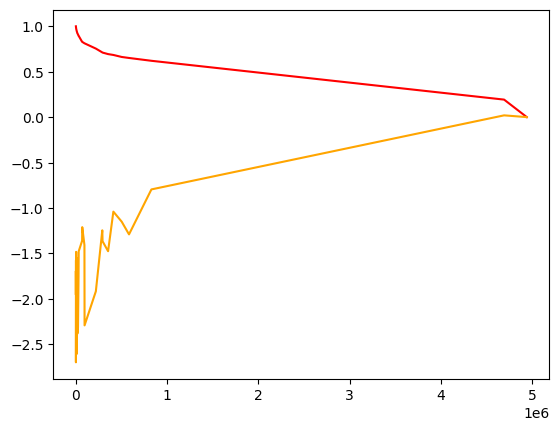

In [18]:

grid = pruning_path.ccp_alphas
plt.plot(grid,R2_in,color="r")
plt.plot(grid,R2_out,color = "orange")
plt.show()


In [19]:
# Pair each alpha with its corresponding R^2 value
paired_values = zip(R2_out, pruning_path.ccp_alphas)

# Find the pair with the maximum R^2 value
max_R2, best_alpha = max(paired_values)

# best_alpha = path.ccp_alphas[np.argmax(R2_out)]

# Print the alpha that gives the largest R^2
print("Alpha for the largest R^2:", best_alpha)
print("The best R^2 value was:", max_R2)

Alpha for the largest R^2: 4693149.473196032
The best R^2 value was: 0.019381312170599574


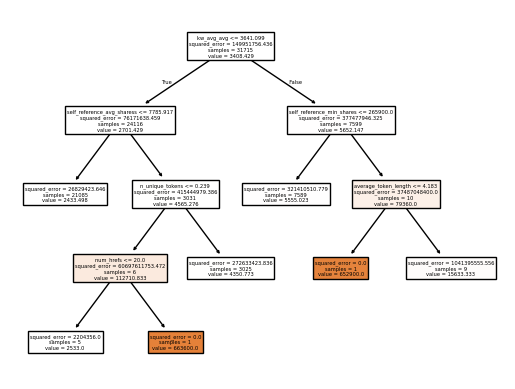

<Figure size 2000x1000 with 0 Axes>

In [20]:
best_alpha_tree = DecisionTreeRegressor(ccp_alpha=best_alpha)
best_alpha_tree.fit(X_train, y_train)
plot_tree(best_alpha_tree, feature_names=X_train.columns, filled=True)
plt.figure(figsize=(20, 10))
plt.tight_layout()
plt.show()

In [21]:
#Now improve with cross validation
from sklearn.model_selection import cross_val_score
best_alpha_tree_cv = DecisionTreeRegressor(ccp_alpha=best_alpha)
# Perform cross-validation
cv_scores = cross_val_score(best_alpha_tree_cv, X_train, y_train, cv=10, scoring='r2')

print(f"Cross-validated R^2 scores: {cv_scores}")
print(f"Mean R^2: {cv_scores.mean():.4f}")
print(f"Standard deviation of R^2: {cv_scores.std():.4f}")


Cross-validated R^2 scores: [ 2.58011113e-03  2.76599894e-02  1.63222613e-02  5.43136164e-03
  5.10987989e-03 -1.28156730e-04 -7.26259147e-01  2.26674882e-02
 -4.74734503e+00  3.09338335e-02]
Mean R^2: -0.5363
Standard deviation of R^2: 1.4210


In [22]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'ccp_alpha': [best_alpha],
    'max_depth': [None, 4,5,6,7,8],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Grid search with cross-validation
grid_search = GridSearchCV(
    DecisionTreeRegressor(),
    param_grid,
    scoring='r2',
    cv=10,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Get the best parameters and performance
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated R^2:", grid_search.best_score_)


Best parameters: {'ccp_alpha': 4693149.473196032, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validated R^2: 0.001126876553332723


In [23]:
cross_validated_tree = DecisionTreeRegressor(grid_search.best_params_)
cross_validated_tree.fit(X_train, y_train)

#Compare out of sample r^2 with cross_validated_tree and best_alpha_tree
print(f"Out of sample r^2 for cross_validated_tree: {r2_score(y_test, cross_validated_tree.predict(X_test)):.4f}")
print(f"Out of sample r^2 for best_alpha_tree: {r2_score(y_test, best_alpha_tree.predict(X_test)):.4f}")

TypeError: DecisionTreeRegressor.__init__() takes 1 positional argument but 2 were given

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0, ccp_alpha=0.005)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("In Sample R^2: ",r2_score(y_train,regressor.predict(X_train)))
print("Out Of Sample R^2: ",r2_score(y_test,y_pred))

* The out-of-sample R^2 ended up being around 0.02. Unfortunately, after countless failed attempts the data could not be submitted right into the tree for the proper use of cost complexity pruning, cross-validation, or random-forests. It took so much time to run each time that even a small adjustment would take around an hour to fully test. So while the tree would probably do a better job if the data was input correctly it did not work for us. So our tree would not be useful in predicting future shares.


Conclusion: Compare each model’s predictive accuracy on the test set. Choose the
best-performing model as the final predictive model. Write a concluding section in your technical report that addresses Mashable's business concerns and presents your final model along with your confidence in its predictions.


The initial concern of Mashable was to predict how many shares a certain news article will get given certain characteristics. In order to assist with this objective, we tried training two different types of models: a linear regression model and a decision tree model. We spent quite a bit of effort optimizing and tuning each of them so they obtained maximum accuracy on the given data. The overall best model for Mashable to use is determined by the out-of-sample accuracy.